

---



##Multilayer Perceptron Classifier

In [1]:
#import data and calculate standard score
import numpy as np
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test)=cifar10.load_data()
features=np.concatenate((x_train,x_test),axis=0).reshape(60000,-1)
labels=np.concatenate((y_train,y_test),axis=0).reshape(1,-1)[0].tolist()
features=features.astype('float')
features -= np.mean(features, axis=0)
features /= np.std(features, axis=0)

Using TensorFlow backend.


170500096/170498071 [==============================] - 13s 0us/step


In [0]:
#MLP model
from sklearn.neural_network import MLPClassifier
def cal_accuracy(train_features,train_labels,test_features,test_labels):
    clf=MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(150,), random_state=1).fit(train_features,train_labels)
    result=clf.predict(test_features)
    n=0
    for i in range(6000):
        confusion[result[i]][test_labels[i]]+=1
        if(result[i]==test_labels[i]):
            n=n+1

    for i in range(10):
        for j in range(6000):
            if(result[j]==i and test_labels[j]==i):
              TP[i]+=1
            if(result[j]==i and test_labels[j]!=i):
              FP[i]+=1
            if(result[j]!=i and test_labels[j]==i):
              FN[i]+=1
            if(result[j]!=i and test_labels[j]!=i):
              TN[i]+=1
    return n/6000

In [0]:
#do PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100).fit(features)
features_PCA=pca.transform(features)

In [4]:
#10-fold cross validation
TP=np.zeros(10)
FP=np.zeros(10)
TN=np.zeros(10)
FN=np.zeros(10)
Accuracy=np.zeros(10)
Precision=np.zeros(10)
Recall=np.zeros(10)
F1_Score=np.zeros(10)
confusion=np.zeros((10,10))
acc=[]
for i in range(10):
    train_features=np.concatenate((features_PCA[0:i*6000], features_PCA[(i+1)*6000:]), axis=0)    
    train_labels=labels[0:i*6000]+labels[(i+1)*6000:]
    test_features=features_PCA[i*6000:(i+1)*6000]
    test_labels=labels[i*6000:(i+1)*6000]
    acc.append(cal_accuracy(train_features,train_labels,test_features,test_labels))
    
print(sum(acc)/10)
for i in range(10):
    Accuracy[i]=(TP[i]+TN[i])/(TP[i]+TN[i]+FN[i]+FP[i])
    Precision[i] = TP[i]/(TP[i]+FP[i])
    Recall[i] = TP[i]/(TP[i]+FN[i])
    F1_Score[i] = 2*(Recall[i] * Precision[i]) / (Recall[i] + Precision[i])

0.5236666666666667


In [5]:
print(Accuracy)
print(Precision)
print(Recall)
print(F1_Score)


[0.91565    0.92546667 0.88256667 0.88205    0.8891     0.88588333
 0.91291667 0.91505    0.92871667 0.90993333]
[0.57863005 0.63195164 0.40916985 0.38381877 0.44735995 0.42984926
 0.55817445 0.5714738  0.63573342 0.54751276]
[0.57583333 0.60983333 0.39266667 0.2965     0.46316667 0.4325
 0.61966667 0.60166667 0.6725     0.57233333]
[0.5772283  0.6206955  0.40074843 0.33455571 0.45512611 0.43117056
 0.58731538 0.5861817  0.65360006 0.55964798]


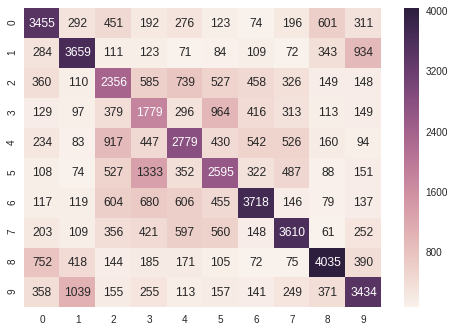

In [6]:
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(confusion, range(10),range(10))
df_cm= df_cm.astype(int)
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, fmt='d')